<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Data_Preprocessing_And_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing

##Data Loading

In [3]:
AAPL = pd.read_csv("/content/drive/MyDrive/Database/AAPL.csv")
TSLA = pd.read_csv("/content/drive/MyDrive/Database/TSLA.csv")
GOOG = pd.read_csv("/content/drive/MyDrive/Database/GOOG.csv")
MSFT = pd.read_csv("/content/drive/MyDrive/Database/MSFT.csv")
AMZN = pd.read_csv("/content/drive/MyDrive/Database/AMZN.csv")

##Apple

In [4]:
AAPL.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9800 non-null   object 
 1   Open        9800 non-null   object 
 2   High        9725 non-null   float64
 3   Low         9725 non-null   float64
 4   Close       9725 non-null   float64
 5   Adj. Close  9725 non-null   float64
 6   Volume      9725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 536.1+ KB


In [6]:
# Drop NULL rows
AAPL.dropna(inplace = True)

In [7]:
# Change Dtype of Columns
AAPL["Date"] = pd.to_datetime(AAPL["Date"])
AAPL["Volume"] = AAPL["Volume"].str.replace(',', '')
AAPL = AAPL.astype({"Open": float, "Volume": float})

In [8]:
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)

In [9]:
# Drop rows having Date < '2015-01-01'
AAPL = AAPL[AAPL["Date"] >= '2015-01-01'].reset_index(drop = True)

In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,50.160265,50.700723,49.618696,50.182447,48.781143,1.449887e+08
std,28.029971,28.433917,27.552589,28.007536,28.560715,7.095025e+07
min,22.500000,22.920000,22.370000,22.580000,21.130000,4.544800e+07
25%,30.000000,30.130000,29.810000,29.990000,27.910000,9.667000e+07
50%,42.020000,42.550000,41.630000,42.100000,40.600000,1.272076e+08
75%,55.100000,55.710000,54.370000,55.170000,53.980000,1.731832e+08
max,143.600000,145.090000,141.370000,143.160000,142.950000,6.488252e+08


##Tesla

In [11]:
TSLA.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,700.00,706.70,659.51,675.50,675.50,"4,10,11,300"
1,25-Feb-2021,726.15,737.21,670.58,682.22,682.22,"3,86,19,900"
2,24-Feb-2021,711.85,745.00,694.17,742.02,742.02,"3,66,77,100"
3,23-Feb-2021,662.13,713.61,619.00,698.84,698.84,"6,63,97,000"
4,22-Feb-2021,762.64,768.50,710.20,714.50,714.50,"3,70,11,700"


In [12]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2686 non-null   object 
 1   Open        2686 non-null   object 
 2   High        2685 non-null   float64
 3   Low         2685 non-null   float64
 4   Close       2685 non-null   float64
 5   Adj. Close  2685 non-null   float64
 6   Volume      2685 non-null   object 
dtypes: float64(4), object(3)
memory usage: 147.0+ KB


In [13]:
# Drop NULL rows
TSLA.dropna(inplace = True)

In [14]:
# Change Dtype of Columns
TSLA["Date"] = pd.to_datetime(TSLA["Date"])
TSLA["Volume"] = TSLA["Volume"].str.replace(',', '')
TSLA = TSLA.astype({"Open": float, "Volume": float})

In [15]:
# Sort the Database by Date
TSLA = TSLA.sort_values(by = 'Date', ignore_index = True)

In [16]:
# Drop rows having Date < '2015-01-01'
TSLA = TSLA[TSLA["Date"] >= '2015-01-01'].reset_index(drop = True)

In [17]:
TSLA.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,110.810891,113.270362,108.205281,110.953628,110.953628,3.992077e+07
std,157.089086,160.828238,152.917803,157.395272,157.395272,2.937944e+07
min,28.460000,30.990000,28.210000,28.730000,28.730000,3.540000e+06
25%,45.760000,46.310000,44.990000,45.700000,45.700000,2.127200e+07
50%,57.600000,59.000000,56.560000,57.930000,57.930000,3.079200e+07
75%,70.510000,71.440000,69.250000,70.360000,70.360000,4.735750e+07
max,891.380000,900.400000,871.600000,883.090000,883.090000,3.046940e+08


##Google

In [18]:
GOOG.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,"2,050.52","2,071.01","2,016.06","2,036.86","2,036.86","20,83,500"
1,25-Feb-2021,"2,067.45","2,094.88","2,021.29","2,031.36","2,031.36","18,26,000"
2,24-Feb-2021,"2,041.83","2,100.78","2,038.13","2,095.17","2,095.17","12,47,400"
3,23-Feb-2021,"2,025.01","2,082.01","2,002.02","2,070.86","2,070.86","16,66,500"
4,22-Feb-2021,"2,067.00","2,091.42","2,062.14","2,064.88","2,064.88","13,66,200"


In [19]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        4162 non-null   object
 1   Open        4162 non-null   object
 2   High        4160 non-null   object
 3   Low         4160 non-null   object
 4   Close       4160 non-null   object
 5   Adj. Close  4160 non-null   object
 6   Volume      4160 non-null   object
dtypes: object(7)
memory usage: 227.7+ KB


In [20]:
# Drop NULL rows
GOOG.dropna(inplace = True)

In [21]:
# Change Dtype of Columns
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  GOOG[col] = GOOG[col].str.replace(',', '')

GOOG = GOOG.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [22]:
# Sort the Database by Date
GOOG = GOOG.sort_values(by = 'Date', ignore_index = True)

In [23]:
# Drop rows having Date < '2015-01-01'
GOOG = GOOG[GOOG["Date"] >= '2015-01-01'].reset_index(drop = True)

In [24]:
GOOG.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,1030.784235,1041.013719,1021.141375,1031.490529,1031.490529,1.735614e+06
std,335.922147,340.932426,332.354344,336.823772,336.823772,8.338749e+05
min,493.300000,494.620000,486.230000,491.200000,491.200000,3.468000e+05
25%,756.540000,764.230000,750.000000,758.090000,758.090000,1.241200e+06
50%,1037.490000,1049.480000,1023.140000,1037.080000,1037.080000,1.525200e+06
75%,1207.140000,1219.760000,1200.130000,1208.670000,1208.670000,1.972100e+06
max,2119.270000,2152.680000,2104.360000,2128.310000,2128.310000,1.116490e+07


##Microsoft

In [25]:
MSFT.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,231.53,235.37,229.54,232.38,232.38,"3,78,11,200"
1,25-Feb-2021,232.08,234.59,227.88,228.99,228.99,"3,94,81,600"
2,24-Feb-2021,230.01,235.20,229.00,234.55,234.55,"2,63,01,400"
3,23-Feb-2021,230.33,234.83,228.73,233.27,233.27,"3,01,91,200"
4,22-Feb-2021,237.42,237.93,232.40,234.51,234.51,"3,64,23,100"


In [26]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8890 entries, 0 to 8889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8890 non-null   object 
 1   Open        8890 non-null   object 
 2   High        8812 non-null   float64
 3   Low         8812 non-null   float64
 4   Close       8812 non-null   float64
 5   Adj. Close  8812 non-null   float64
 6   Volume      8812 non-null   object 
dtypes: float64(4), object(3)
memory usage: 486.3+ KB


In [27]:
# Drop NULL rows
MSFT.dropna(inplace = True)

In [28]:
# Change Dtype of Columns
MSFT["Date"] = pd.to_datetime(MSFT["Date"])
MSFT["Open"] = MSFT["Open"].str.replace(',', '')
MSFT["Volume"] = MSFT["Volume"].str.replace(',', '')
MSFT = MSFT.astype({"Open": float, "Volume": float})

In [29]:
# Sort the Database by Date
MSFT = MSFT.sort_values(by = 'Date', ignore_index = True)

In [30]:
# Drop rows having Date < '2015-01-01'
MSFT = MSFT[MSFT["Date"] >= '2015-01-01'].reset_index(drop = True)

In [31]:
MSFT.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.00000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,102.995320,103.99847,101.948806,103.031343,99.744235,3.053693e+07
std,55.125024,55.79860,54.423005,55.144477,56.333505,1.474586e+07
min,40.340000,40.74000,39.720000,40.290000,35.810000,7.425600e+06
25%,56.080000,56.63000,55.610000,56.190000,51.520000,2.146110e+07
50%,89.800000,90.88000,88.400000,89.710000,85.960000,2.696110e+07
75%,137.190000,138.35000,135.930000,137.080000,134.800000,3.475450e+07
max,245.030000,246.13000,242.920000,244.990000,244.430000,1.691640e+08


##Amazon

In [32]:
AMZN.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,"3,095.20","3,122.44","3,036.70","3,092.93","3,092.93","42,73,500"
1,25-Feb-2021,"3,136.74","3,178.26","3,047.76","3,057.16","3,057.16","45,07,100"
2,24-Feb-2021,"3,166.75","3,171.23","3,125.38","3,159.53","3,159.53","30,03,000"
3,23-Feb-2021,"3,127.03","3,204.73","3,093.60","3,194.50","3,194.50","46,69,500"
4,22-Feb-2021,"3,208.13","3,232.32","3,172.26","3,180.74","3,180.74","35,04,600"


In [33]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5989 non-null   object
 1   Open        5989 non-null   object
 2   High        5986 non-null   object
 3   Low         5986 non-null   object
 4   Close       5986 non-null   object
 5   Adj. Close  5986 non-null   object
 6   Volume      5986 non-null   object
dtypes: object(7)
memory usage: 327.6+ KB


In [34]:
# Drop NULL rows
AMZN.dropna(inplace = True)

In [35]:
# Change Dtype of Columns
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  AMZN[col] = AMZN[col].str.replace(',', '')

AMZN = AMZN.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [36]:
# Sort the Database by Date
AMZN = AMZN.sort_values(by = 'Date', ignore_index = True)

In [37]:
# Drop rows having Date < '2015-01-01'
AMZN = AMZN[AMZN["Date"] >= '2015-01-01'].reset_index(drop = True)

In [38]:
AMZN.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,1423.236514,1438.067463,1406.292744,1422.724538,1422.724538,4.301081e+06
std,834.372402,844.761504,822.021255,833.312139,833.312139,2.204558e+06
min,286.280000,290.790000,285.250000,286.950000,286.950000,8.813000e+05
25%,740.140000,746.100000,732.750000,739.610000,739.610000,2.865900e+06
50%,1368.000000,1396.030000,1344.010000,1371.990000,1371.990000,3.718100e+06
75%,1852.690000,1871.320000,1832.650000,1858.000000,1858.000000,5.070300e+06
max,3547.000000,3552.250000,3486.690000,3531.450000,3531.450000,2.385610e+07


#Exploratory Data Analysis

In [39]:
Companies = [AAPL, TSLA, GOOG, MSFT, AMZN]
Companies_Title = ["Apple", "Tesla", "Google", "Microsoft", "Amazon"]

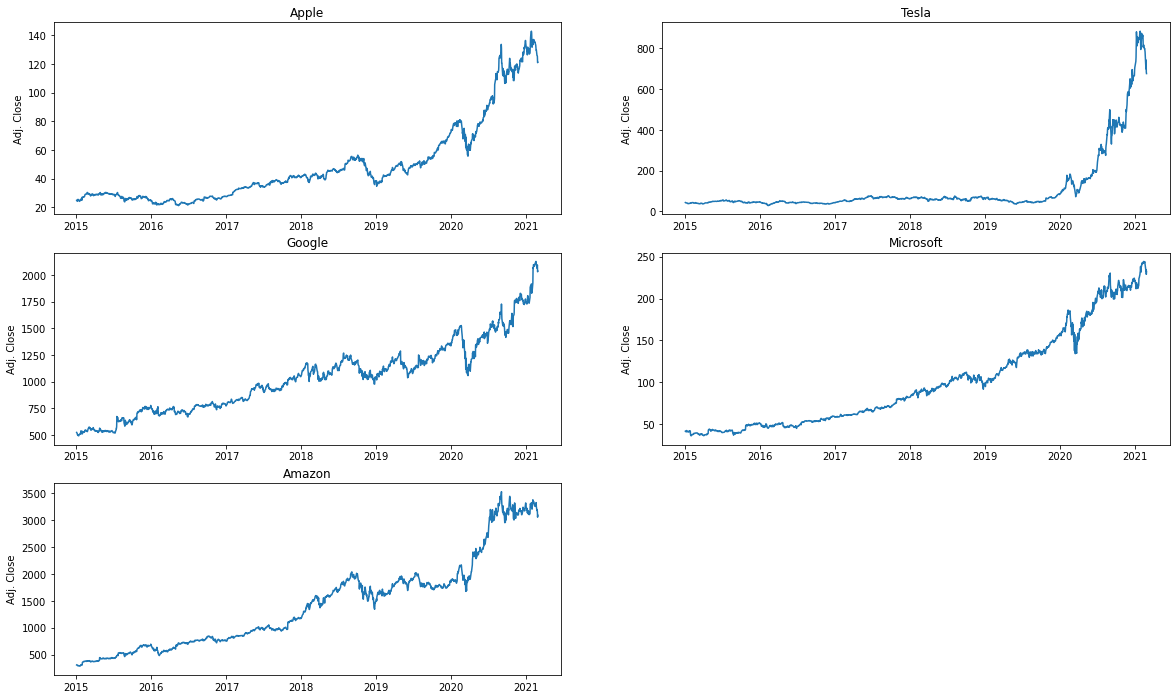

In [40]:
# Lets view historical view of the closing prices

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Adj. Close')

We can see from the  above graph that Telsa shares have tremendous growth in the 2020-2021 period.

If we follow the news, it can be due to


1.   Emission Credit Sales
2.   Tesla entering the Fast-Growing Compact SUV Market
3.   Starting production in China

For the rest of the Companies, we can see that COVID-19 is the primary factor affecting the 2020-2021 period.



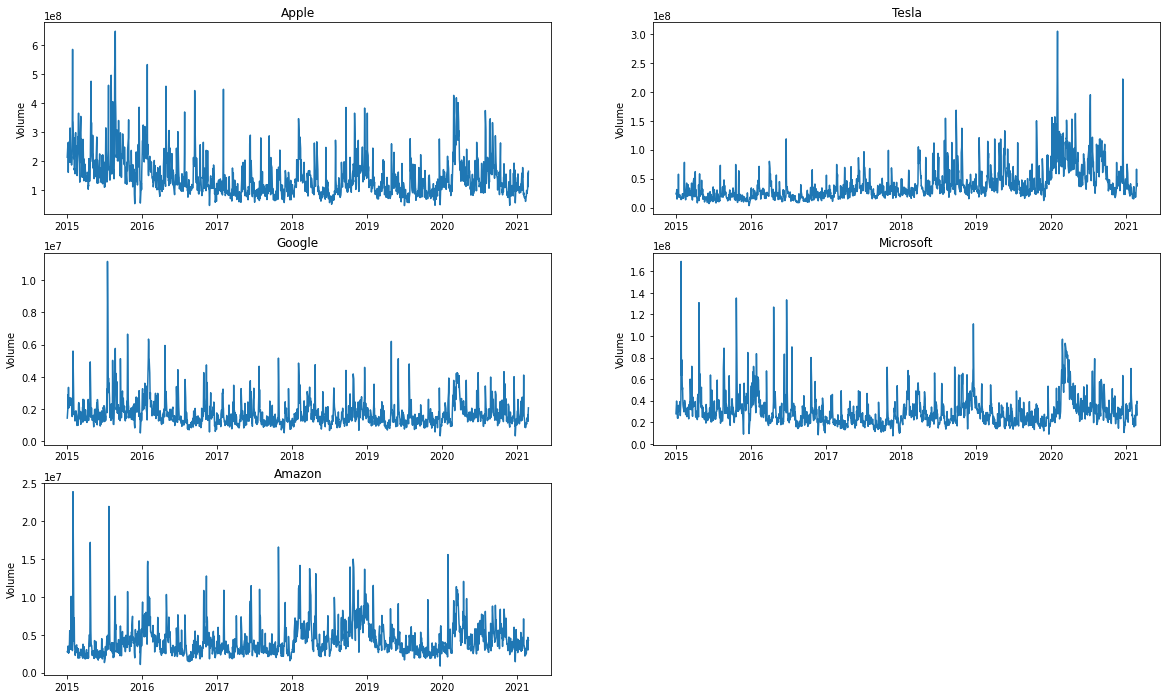

In [41]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Volume"])
  plt.title(Companies_Title[index])
  plt.ylabel('Volume')

Now, we have seen the visualizations for the closing price and volume traded each day, let's go ahead and calculate the moving average of the stock.

### What was the moving average of the various stocks ?

In [42]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Adj. Close"].rolling(Moving_Average).mean()

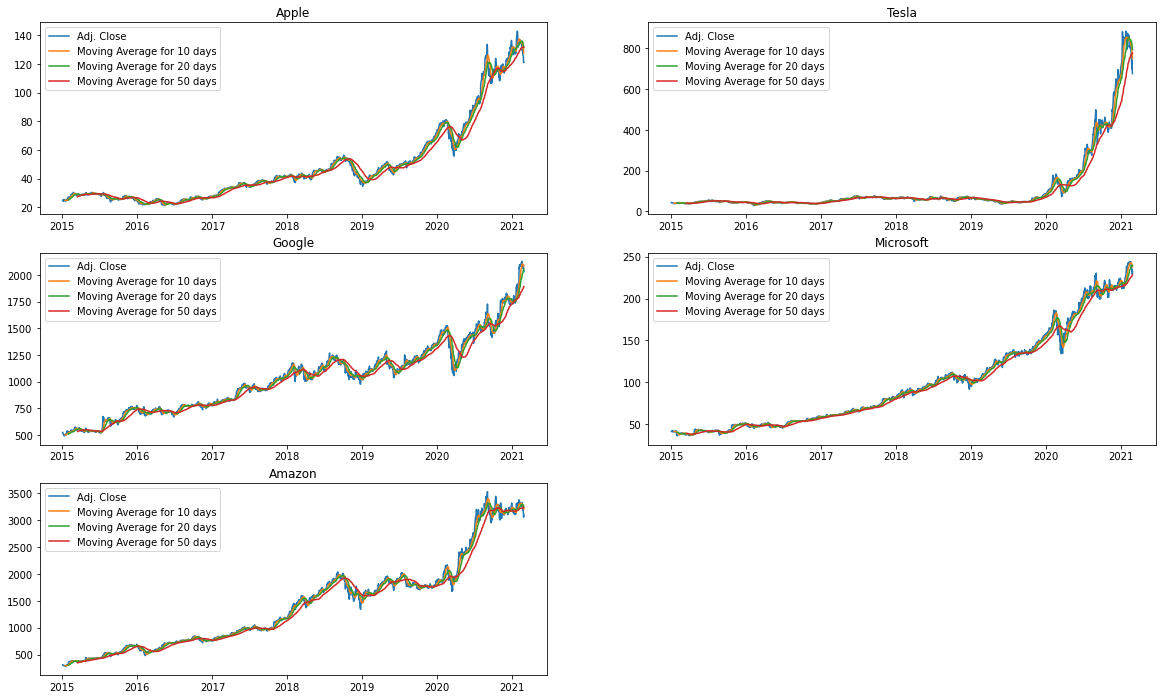

In [43]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.plot(company["Date"], company["Moving Average for 10 days"])
  plt.plot(company["Date"], company["Moving Average for 20 days"])
  plt.plot(company["Date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [44]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 

for company in Companies:
  company["Daily Return"] = company["Adj. Close"].pct_change()

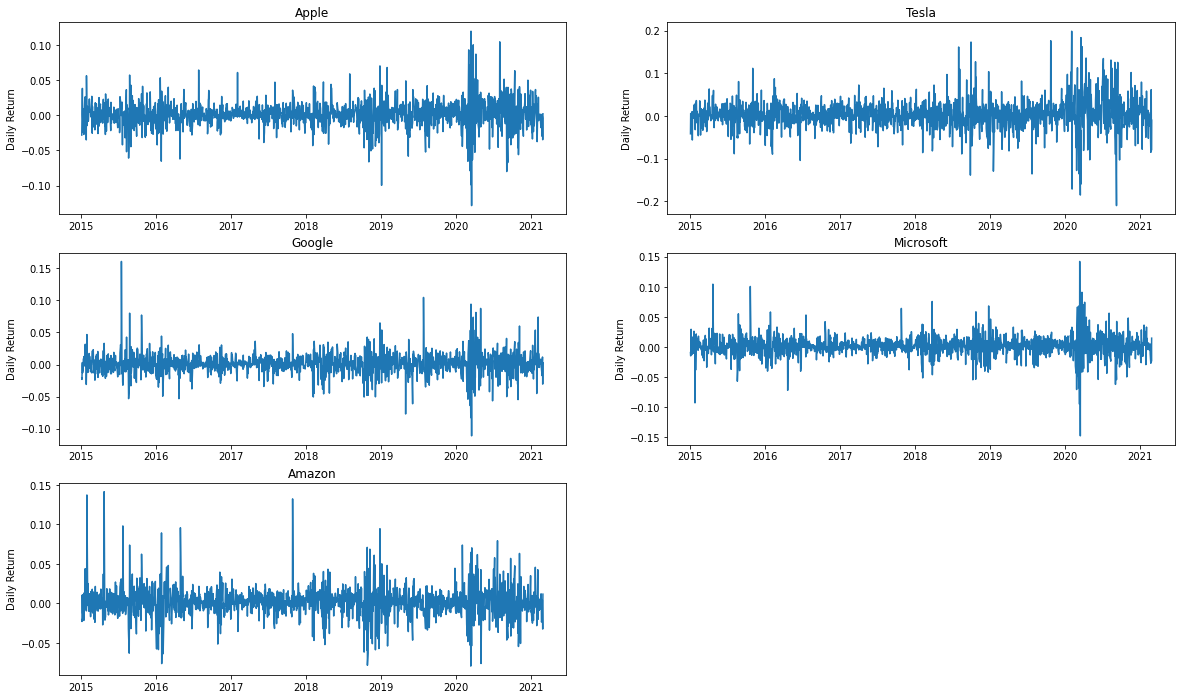

In [45]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

Now, let's get an overall at the average daily return using a histogram.

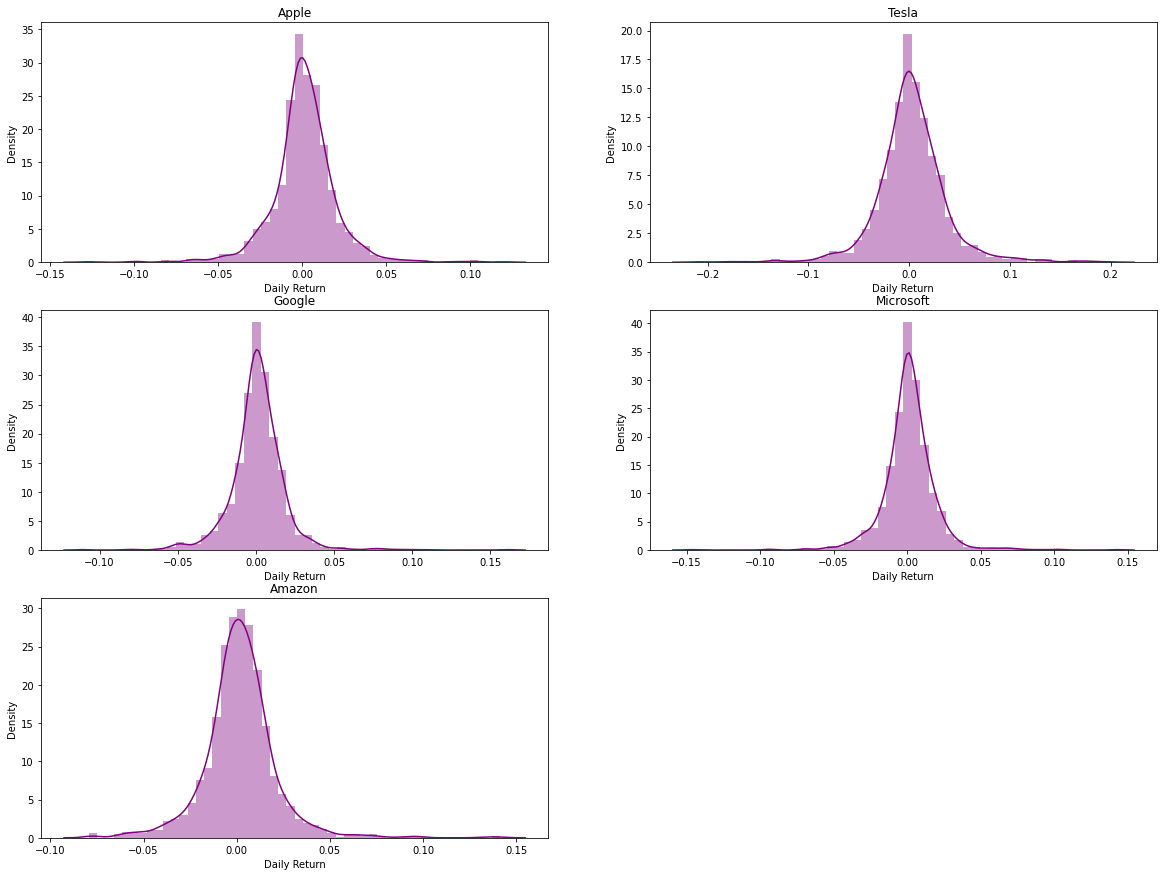

In [46]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [47]:
print("Kurtosis Value")
for index, company in enumerate(Companies):
  print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 6.405686938843391
Tesla: 5.764945983385828
Google: 10.086026546409723
Microsoft: 10.603491741447666
Amazon: 7.135284710744968


The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

### What was the correlation between diffrent stocks closing price ?

In [48]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["AAPL"] = AAPL["Adj. Close"]
Companies_returns["TSLA"] = TSLA["Adj. Close"]
Companies_returns["GOOG"] = GOOG["Adj. Close"]
Companies_returns["MSFT"] = MSFT["Adj. Close"]
Companies_returns["AMZN"] = AMZN["Adj. Close"]
Companies_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,24.86,43.86,523.37,41.44,308.52
1,24.16,42.02,512.46,41.06,302.19
2,24.16,42.26,500.59,40.46,295.29
3,24.50,42.19,499.73,40.97,298.42
4,25.44,42.12,501.30,42.18,300.46


In [49]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,-0.028158,-0.041952,-0.020846,-0.009170,-0.020517
2,0.000000,0.005712,-0.023163,-0.014613,-0.022833
3,0.014073,-0.001656,-0.001718,0.012605,0.010600
4,0.038367,-0.001659,0.003142,0.029534,0.006836


Now, let's do a correlation plot, to get actual numerical values for the correlation between the stocks closing price

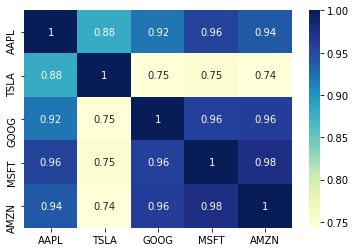

In [50]:
sns.heatmap(Companies_returns.corr(), annot=True, cmap="YlGnBu")

Finally, let's do a correlation plot, to get actual numerical values for the correlation between the stocks daily returns.

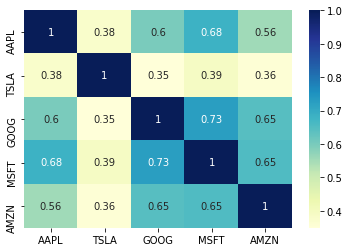

In [51]:
sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="YlGnBu")

From the above plot, we can see that Microsoft and Google had the strongest correlation in stocks daily returns.

### How much value do we put at risk by investing in a paticular stock ?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

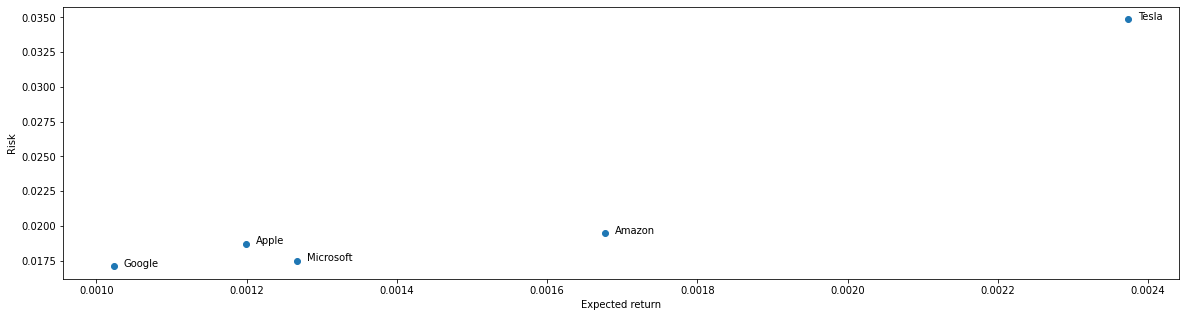

In [52]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies_Title, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')

From the above graph, we can see that Tesla has the highest expected returns and the highest risk factor. Google has the lowest expected returns and the lowest risk factor.